# Causal Inference in Decision Intelligence – Part 18: Industry Analysis

Link to the article:  [Industry Analysis](https://www.linkedin.com/pulse/causal-inference-decision-intelligence-part-18-eugene-zinoviev-na1bc)

## Import Libraries

In [1]:
# Import libraries
import numpy as np
import pandas as pd

from sklearn.linear_model import MultiTaskElasticNet

## Generate the data

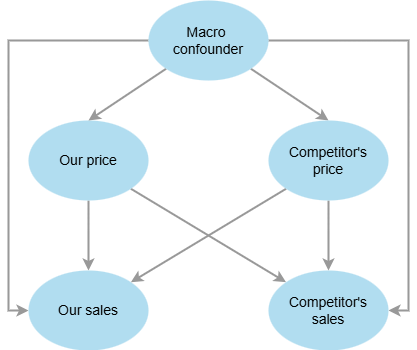

In [2]:
# Set the sample size
n = 1000

In [3]:
np.random.seed(2)

# Generate a confounder
W = np.random.randn(n)

# Generate prices
P1 = np.random.uniform(low=10.0, high=14.0, size=n) + 3 * W
P2 = np.random.uniform(low=10.0, high=14.0, size=n) + 4 * W
X = pd.DataFrame({"P1":P1, "P2":P2, "W": W})

# Generate sales
S1 = 100 - 15.0 * P1 + 12.0 * P2 + 2.0 * W + np.random.randn(n)
S2 = 100 + 12.0 * P1 - 15.0 * P2 + 1.5 * W + np.random.randn(n)
S = pd.DataFrame({"S1":S1, "S2":S2})

## Build a cross-price elasticity model

In [4]:
# Run a Multitask Elastic Net model
model = MultiTaskElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
model.fit(X, S) 

MultiTaskElasticNet(alpha=0.1, random_state=42)

In [5]:
# Print the effects
print(f"Effect of our price on our sales: ${round(model.coef_[0,0], 2)}")
print(f"Effect of our price on the competitor's sales: ${round(model.coef_[1,0], 2)}")
print(f"Effect of the competitor's price on our sales: ${round(model.coef_[0,1],2)}")
print(f"Effect of the competitor's price on the competitor's sales: ${round(model.coef_[1,1],2)}")

Effect of our price on our sales: $-14.24
Effect of our price on the competitor's sales: $11.56
Effect of the competitor's price on our sales: $11.75
Effect of the competitor's price on the competitor's sales: $-14.35


## Predict sales

In [6]:
# Predict all possible combination of our and the competitor's prices 
X_test = pd.DataFrame({'P1': [10, 10, 12, 12], 'P2': [10, 12, 10, 12], 'W': [0, 0, 0, 0]})
pred=model.predict(X_test)
pred1 = pd.DataFrame(pred).rename(columns={0: 'Our Sales', 1: 'Competitor Sales'})

In [7]:
# Create a data frame with prices, sales and revenues
prediction = pd.concat([X_test, pred1], axis=1)
prediction['Our Revenue'] = prediction['P1'] * prediction['Our Sales']
prediction['Competitor Revenue'] = prediction['P2'] * prediction['Competitor Sales']
round(prediction, 2)

,P1,P2,W,Our Sales,Competitor Sales,Our Revenue,Competitor Revenue
0,10,10,0,69.01,69.51,690.15,695.15
1,10,12,0,92.52,40.82,925.21,489.83
2,12,10,0,40.53,92.64,486.35,926.40
3,12,12,0,64.04,63.94,768.43,767.33


In [8]:
# Generate a pivot table of our revenue based on our and competitor's prices
pt= pd.pivot_table(prediction, values="Our Revenue", index="P1", columns="P2", aggfunc="mean")
round(pt, 1)

P2,10,12
P1,,
10,690.1,925.2
12,486.4,768.4
